Ica Wahyu Diana - 202010370311220
### TUGAS UAS Penalaran Komputer A

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split,TimeSeriesSplit
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

sns.set_style('darkgrid')

# %matplotlib inline
plt.style.use('seaborn-whitegrid')
import xgboost as xgb
from sklearn.metrics import  mean_absolute_error
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

<ipython-input-35-f21544182ad1>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
def plotter(res):
    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid

    #plot the complete time series
    fig, axs = plt.subplots(4, figsize=(16,8))
    axs[0].set_title('OBSERVED', fontsize=16)
    axs[0].plot(observed)
    axs[0].grid()

    #plot the trend of the time series
    axs[1].set_title('TREND', fontsize=16)
    axs[1].plot(trend)
    axs[1].grid()

    #plot the seasonality of the time series. Period=24 daily seasonality | Period=24*7 weekly seasonality.
    axs[2].set_title('SEASONALITY', fontsize=16)
    axs[2].plot(seasonal)
    axs[2].grid()

    #plot the noise of the time series
    axs[3].set_title('NOISE', fontsize=16)
    axs[3].plot(residual)
    axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
    axs[3].grid()

    plt.tight_layout()
    plt.show()

In [ ]:
def create_features_datetime(df):

    df['year']=df.index.year
    df['month']=df.index.month
    df['day_of_week']=df.index.day_of_week
    df['hour'] = df.index.hour

    return df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving MLTempDataset1.csv to MLTempDataset1.csv


{'MLTempDataset1.csv': b',Datetime,Hourly_Temp\r\n0,2022-01-04 00:00:00,20.867\r\n1,2022-01-04 01:00:00,21.0\r\n2,2022-01-04 02:00:00,20.867\r\n3,2022-01-04 03:00:00,20.65\r\n4,2022-01-04 04:00:00,20.4\r\n5,2022-01-04 05:00:00,20.1\r\n6,2022-01-04 06:00:00,19.8\r\n7,2022-01-04 07:00:00,19.5\r\n8,2022-01-04 08:00:00,19.4\r\n9,2022-01-04 09:00:00,19.5\r\n10,2022-01-04 10:00:00,19.933\r\n11,2022-01-04 11:00:00,20.75\r\n12,2022-01-04 12:00:00,21.833\r\n13,2022-01-04 13:00:00,22.75\r\n14,2022-01-04 14:00:00,23.7\r\n15,2022-01-04 15:00:00,24.6\r\n16,2022-01-04 16:00:00,25.1\r\n17,2022-01-04 17:00:00,12.1\r\n18,2022-01-04 18:00:00,19.667\r\n19,2022-01-04 19:00:00,23.133\r\n20,2022-01-04 20:00:00,23.1\r\n21,2022-01-04 21:00:00,22.7\r\n22,2022-01-04 22:00:00,22.3\r\n23,2022-01-04 23:00:00,21.8\r\n24,2022-01-05 00:00:00,21.333\r\n25,2022-01-05 01:00:00,20.933\r\n26,2022-01-05 02:00:00,20.567\r\n27,2022-01-05 03:00:00,20.25\r\n28,2022-01-05 04:00:00,20.1\r\n29,2022-01-05 05:00:00,15.667\r\n30,202

In [ ]:
df = pd.read_csv('MLTempDataset1.csv')
df

,Unnamed: 0,Datetime,Hourly_Temp
0,0,2022-01-04 00:00:00,20.867
1,1,2022-01-04 01:00:00,21.000
2,2,2022-01-04 02:00:00,20.867
3,3,2022-01-04 03:00:00,20.650
4,4,2022-01-04 04:00:00,20.400
...,...,...,...
7051,7051,2022-10-24 19:00:00,25.567
7052,7052,2022-10-24 20:00:00,25.183
7053,7053,2022-10-24 21:00:00,24.600
7054,7054,2022-10-24 22:00:00,23.986


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Datetime,Hourly_Temp
0,2022-01-04 00:00:00,20.867
1,2022-01-04 01:00:00,21.000
2,2022-01-04 02:00:00,20.867
3,2022-01-04 03:00:00,20.650
4,2022-01-04 04:00:00,20.400


In [ ]:
date_col='Datetime'

df[date_col]=pd.to_datetime(df[date_col])
df=df.set_index(date_col)
df.head()

,Hourly_Temp
Datetime,
2022-01-04 00:00:00,20.867
2022-01-04 01:00:00,21.000
2022-01-04 02:00:00,20.867
2022-01-04 03:00:00,20.650
2022-01-04 04:00:00,20.400


### Null Headmap

<Axes: xlabel='Datetime'>

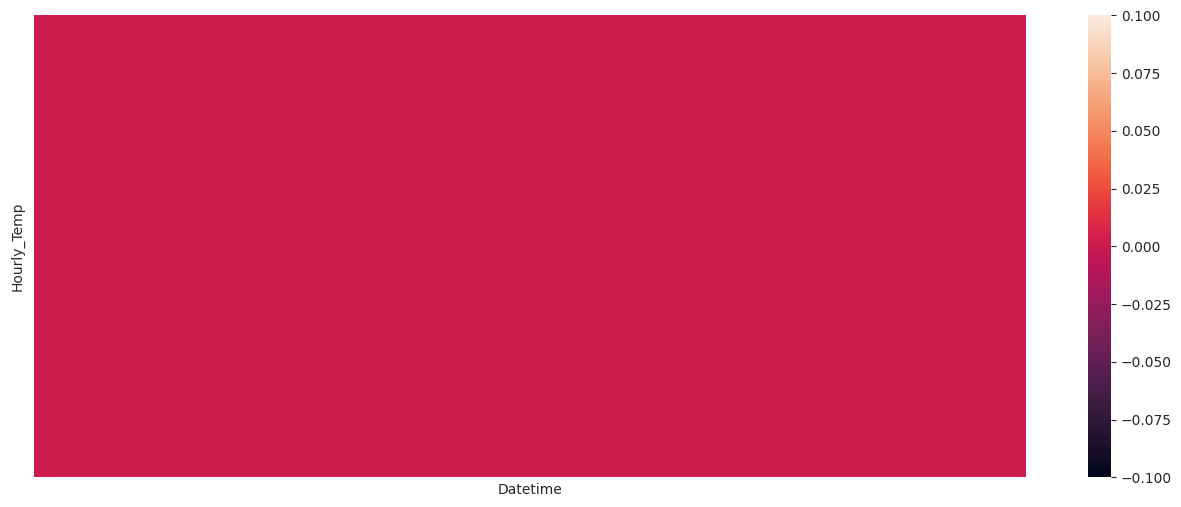

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isna().transpose(),xticklabels=False)

### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7056 entries, 2022-01-04 00:00:00 to 2022-10-24 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hourly_Temp  7056 non-null   float64
dtypes: float64(1)
memory usage: 368.3 KB


In [ ]:
df.describe()

,Hourly_Temp
count,7056.000000
mean,21.867468
std,6.737313
min,5.350000
25%,18.400000
50%,24.033000
75%,26.333000
max,36.500000


In [ ]:
col='Hourly_Temp'

<Axes: xlabel='Datetime', ylabel='Hourly_Temp'>

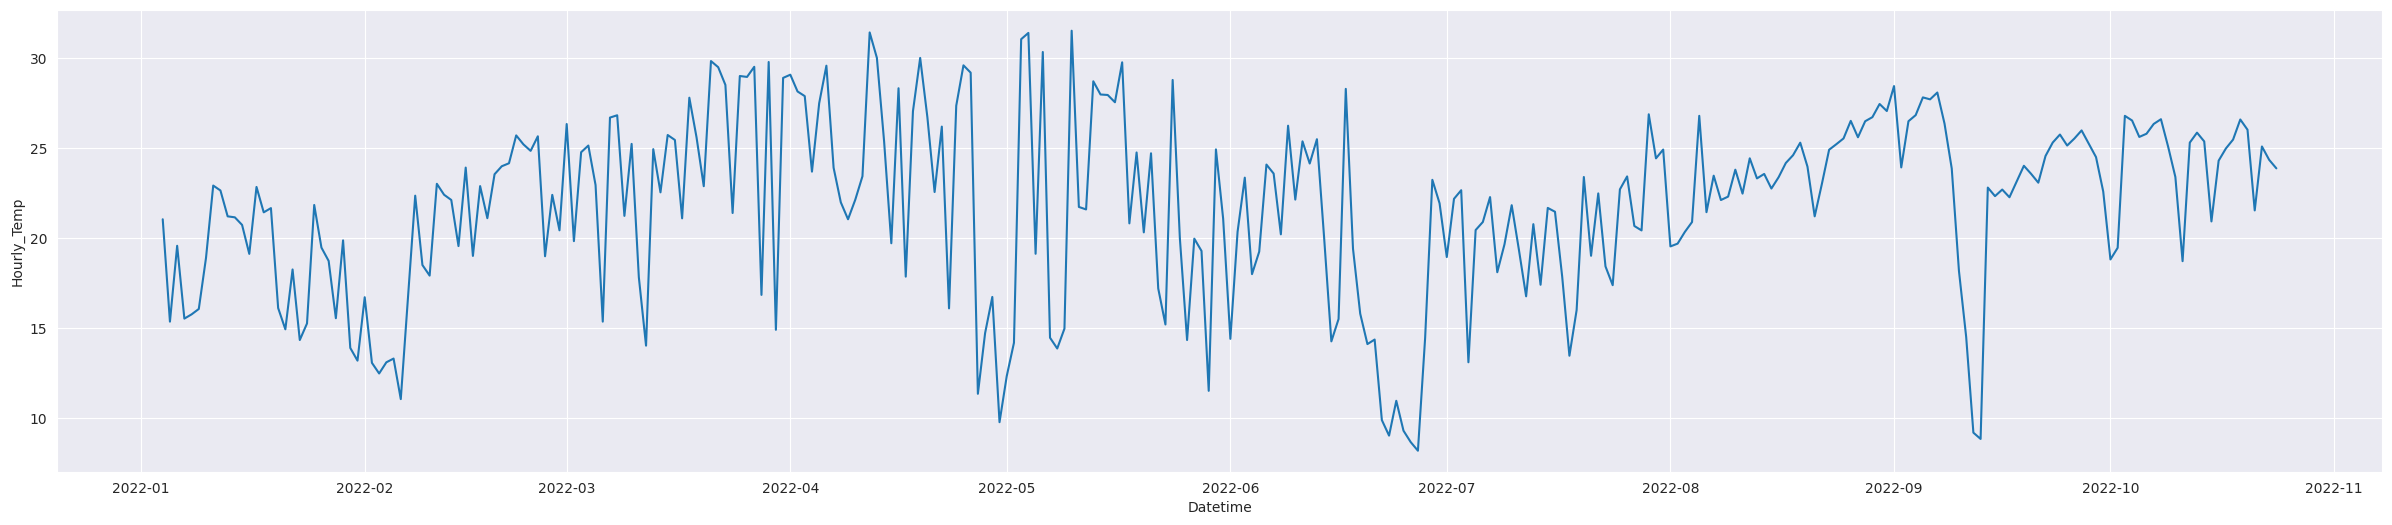

In [ ]:
plt.figure(figsize=(30,6))
sns.lineplot(data=df[col].resample('D').mean())

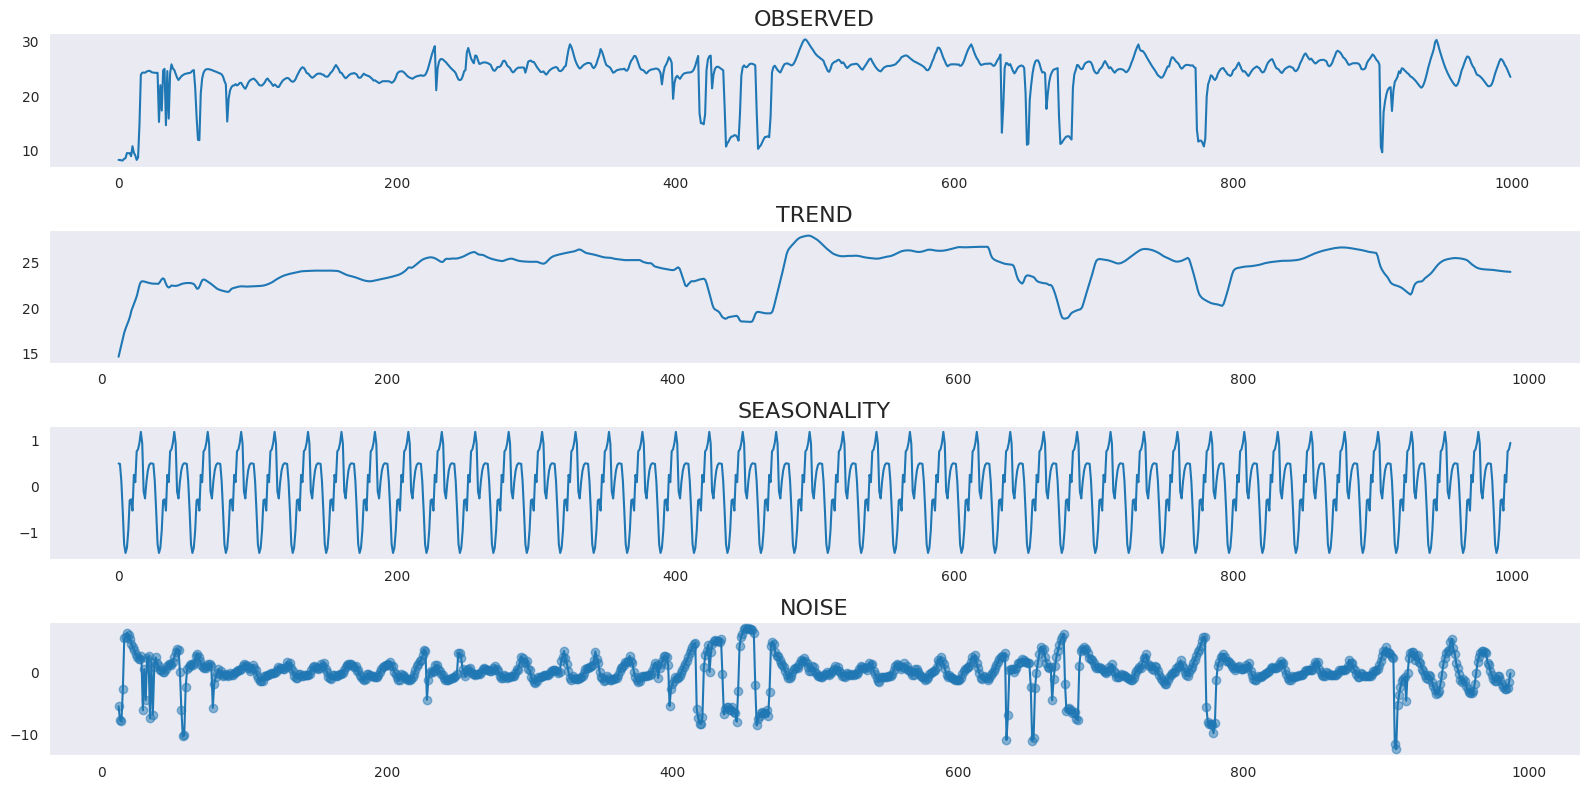

In [ ]:
# Last 1000 values
result = seasonal_decompose(x=df[col].iloc[-1000:].values,period=24)
plotter(result)

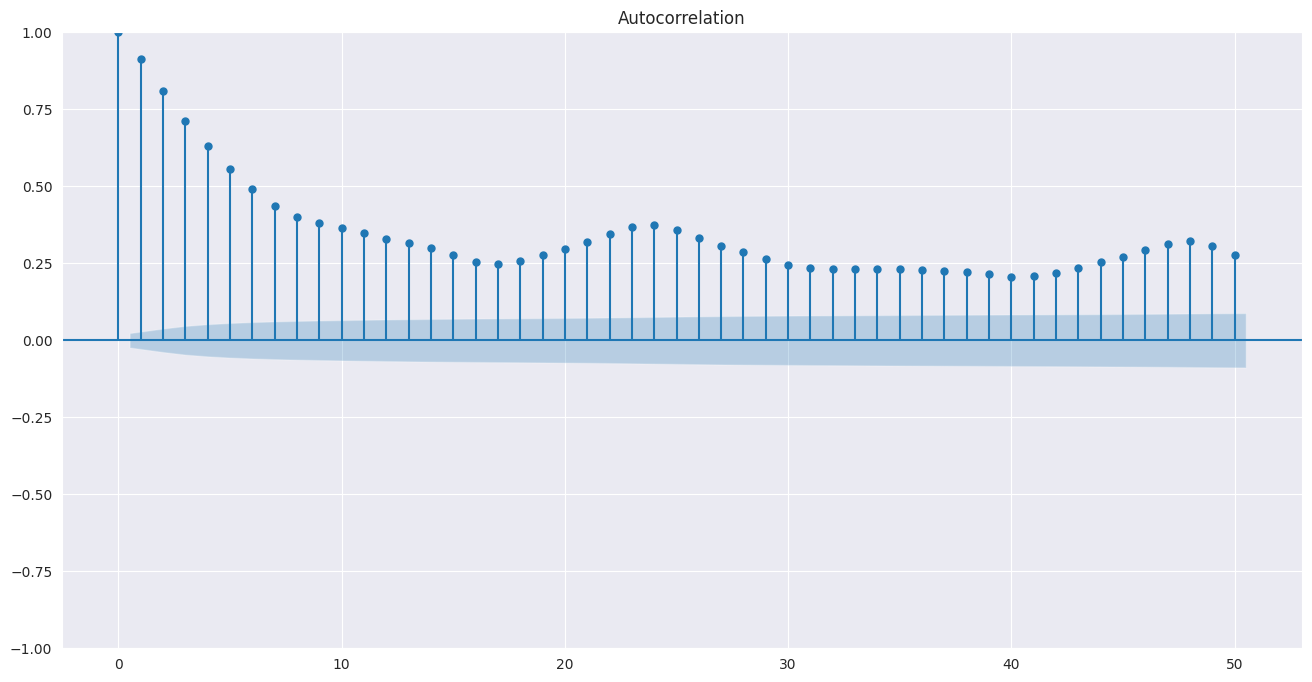

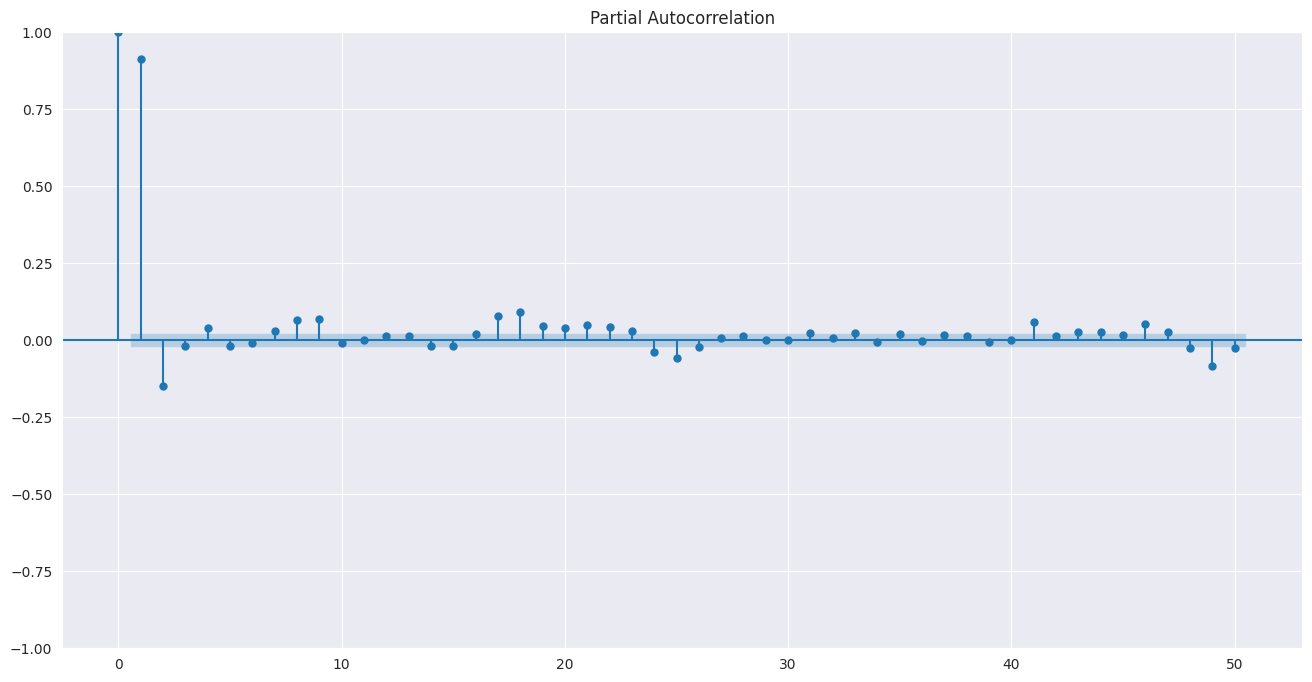

In [ ]:
lagger=50

fig, ax = plt.subplots(figsize=(16,8))
fig1, ax1 = plt.subplots(figsize=(16,8))

_=plot_acf(x=df[col],ax=ax,lags=lagger)
_=plot_pacf(x=df[col],method='ywm',ax=ax1,lags=lagger)

In [ ]:
lag=1
df[f'{col}_lag_{lag}']=df[col].shift(lag)

In [ ]:
lag=24
df[f'{col}_lag_{lag}']=df[col].shift(lag)

In [ ]:
df.dropna(inplace=True)
df.head()

,Hourly_Temp,Hourly_Temp_lag_1,Hourly_Temp_lag_24
Datetime,,,
2022-01-05 00:00:00,21.333,21.800,20.867
2022-01-05 01:00:00,20.933,21.333,21.000
2022-01-05 02:00:00,20.567,20.933,20.867
2022-01-05 03:00:00,20.250,20.567,20.650
2022-01-05 04:00:00,20.100,20.250,20.400


In [ ]:
df=create_features_datetime(df)
df.head()

,Hourly_Temp,Hourly_Temp_lag_1,Hourly_Temp_lag_24,year,month,day_of_week,hour
Datetime,,,,,,,
2022-01-05 00:00:00,21.333,21.800,20.867,2022,1,2,0
2022-01-05 01:00:00,20.933,21.333,21.000,2022,1,2,1
2022-01-05 02:00:00,20.567,20.933,20.867,2022,1,2,2
2022-01-05 03:00:00,20.250,20.567,20.650,2022,1,2,3
2022-01-05 04:00:00,20.100,20.250,20.400,2022,1,2,4


### Separating X and Y

In [ ]:
X=df.drop([col],axis=1)
y=df[[col]]

### Train Test Split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=24*7,shuffle=False)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6864, 6), (168, 6), (6864, 1), (168, 1))

In [ ]:
X_test.head()

,Hourly_Temp_lag_1,Hourly_Temp_lag_24,year,month,day_of_week,hour
Datetime,,,,,,
2022-10-18 00:00:00,25.000,24.450,2022,10,1,0
2022-10-18 01:00:00,24.883,24.220,2022,10,1,1
2022-10-18 02:00:00,24.650,23.820,2022,10,1,2
2022-10-18 03:00:00,24.283,23.533,2022,10,1,3
2022-10-18 04:00:00,24.100,23.960,2022,10,1,4


In [ ]:
y_test.head()

,Hourly_Temp
Datetime,
2022-10-18 00:00:00,24.883
2022-10-18 01:00:00,24.650
2022-10-18 02:00:00,24.283
2022-10-18 03:00:00,24.100
2022-10-18 04:00:00,24.429


### Model fitting

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
reg_1=LinearRegression(n_jobs=-1)
reg_2=XGBRegressor(n_estimators=500)
reg_3=RandomForestRegressor(n_estimators=500,n_jobs=-1)
reg_4=DecisionTreeRegressor()

reg_list=[reg_1,reg_2,reg_3,reg_4]

In [ ]:
%%time
print("-"*50)
for reg in reg_list:
    reg_name=reg.__class__.__name__
    reg.fit(X_train,y_train.values.ravel())
    print(f"Fitting {reg_name} done")
    print("-"*50)

--------------------------------------------------
Fitting LinearRegression done
--------------------------------------------------
Fitting XGBRegressor done
--------------------------------------------------
Fitting RandomForestRegressor done
--------------------------------------------------
Fitting DecisionTreeRegressor done
--------------------------------------------------
CPU times: user 21.4 s, sys: 361 ms, total: 21.8 s
Wall time: 13.6 s


In [ ]:
score_dict={}
for reg in reg_list:

    reg_name = reg.__class__.__name__

    pred=reg.predict(X_test)

    print("-"*50)

    print(reg_name)

    print(f"R2 Score : {r2_score(y_test,pred)}")
    print(f"Mean Absolute Error Score : {mean_absolute_error(y_test,pred)}")
    print(f"Mean Sqaured Error Score : {mean_squared_error(y_test,pred)}")
    print(f"Root Mean Squared Error: {mean_squared_error(y_test,pred, squared=False)}")

    score_dict[reg_name]={
        "R2 Score":r2_score(y_test,pred),
        "Mean Absolute Error Score":mean_absolute_error(y_test,pred),
        "Mean Squared Error Score":mean_squared_error(y_test,pred),
        "Root Mean Squared Error": mean_squared_error(y_test,pred, squared=False)
    }

print("-"*50)

--------------------------------------------------
LinearRegression
R2 Score : 0.7239523398849357
Mean Absolute Error Score : 0.5944554686115725
Mean Sqaured Error Score : 1.9991468246718387
Root Mean Squared Error: 1.4139118871668908
--------------------------------------------------
XGBRegressor
R2 Score : 0.35535800176438914
Mean Absolute Error Score : 1.1252833041690644
Mean Sqaured Error Score : 4.66851993342617
Root Mean Squared Error: 2.1606758047949186
--------------------------------------------------
RandomForestRegressor
R2 Score : 0.5878170401080733
Mean Absolute Error Score : 0.827163166666664
Mean Sqaured Error Score : 2.985043434558775
Root Mean Squared Error: 1.727727824212707
--------------------------------------------------
DecisionTreeRegressor
R2 Score : 0.21714334883749287
Mean Absolute Error Score : 1.0537440476190474
Mean Sqaured Error Score : 5.669475291666666
Root Mean Squared Error: 2.381065999015287
--------------------------------------------------


In [ ]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values("R2 Score",ascending=False)
score_pd

,R2 Score,Mean Absolute Error Score,Mean Squared Error Score,Root Mean Squared Error
LinearRegression,0.723952,0.594455,1.999147,1.413912
RandomForestRegressor,0.587817,0.827163,2.985043,1.727728
XGBRegressor,0.355358,1.125283,4.668520,2.160676
DecisionTreeRegressor,0.217143,1.053744,5.669475,2.381066


<Axes: >

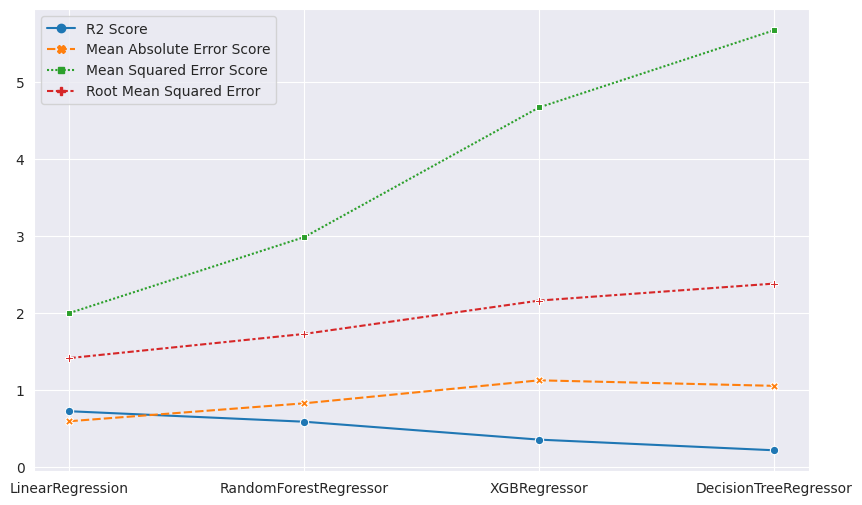

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=score_pd.iloc[:,[0,1,2,3]],markers=True)

### Plotting

<Axes: xlabel='Datetime'>

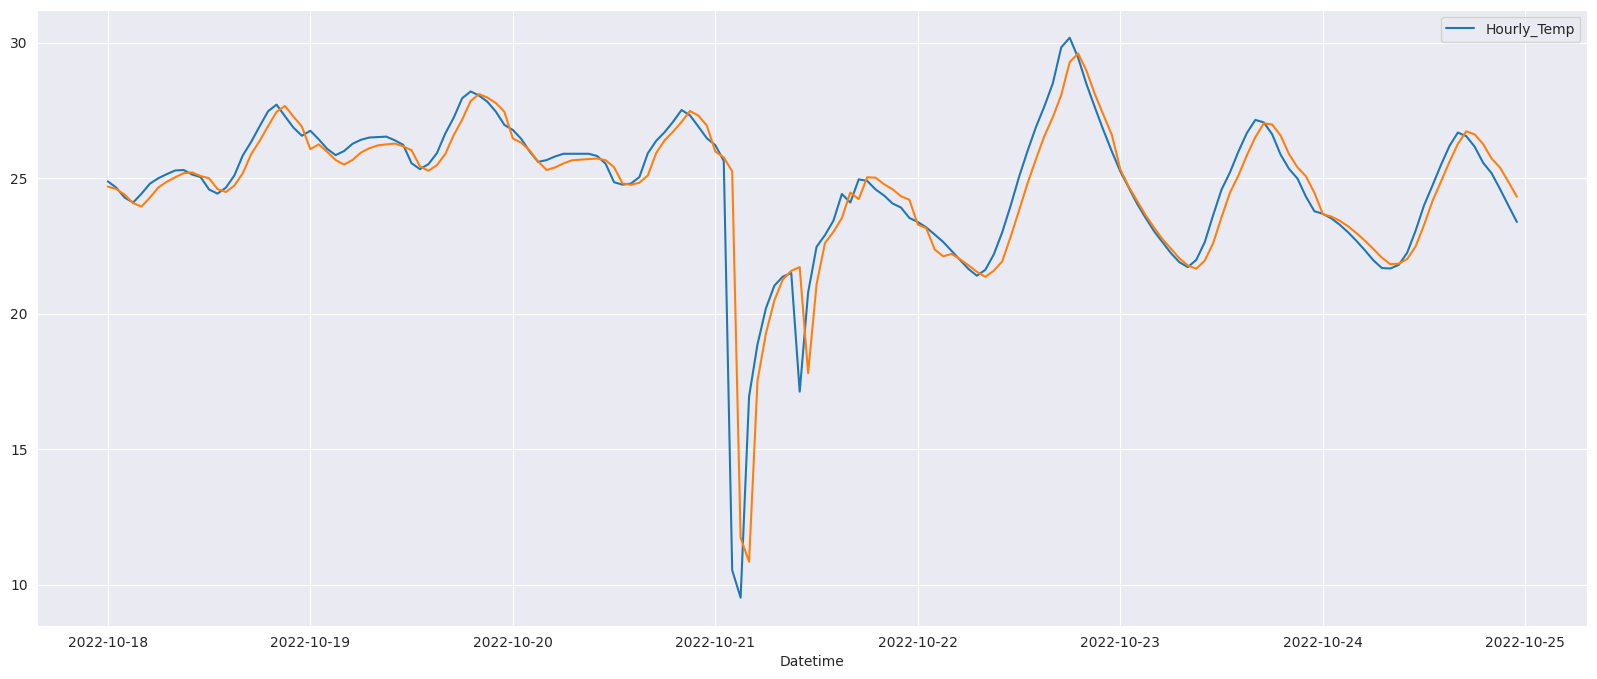

In [ ]:
pred=reg_1.predict(X_test)

fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=y_test,ax=ax,legend="full")
sns.lineplot(y=pred,x=y_test.index,ax=ax,legend="full")